In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
import pickle


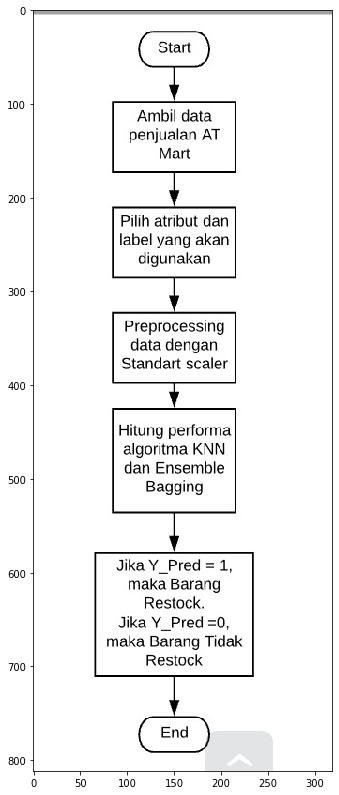

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

plt.figure(figsize=(20, 14))
pil_im = Image.open('flow.jpg') #Take jpg + png

im_array = np.asarray(pil_im)
plt.imshow(im_array)
plt.show()

In [2]:
col_names = ['kode barang', 'nama barang', 'tersedia','terjual','persen','label']
data=pd.read_csv("uas.csv", sep=";", header=None, names=col_names)
data.index+=1
data.head()

,kode barang,nama barang,tersedia,terjual,persen,label
1,8999999529710,CLEAR COOL SPORT MENTHOL 160ML,5,3,50%,1
2,8991917101541,DJARUM CHIEF 12,256,2,50%,0
3,5706500000114,MAK NI KERIPIK TEMPE SAGU,8,1,50%,0
4,899908260208,NEO HEMAFITON PASAK BUMI,20,2,50%,0
5,181800022,PLAKBAN COKLAT NACHI,299,2,50%,0


In [3]:
minStok = min(data.tersedia)
maxStok = max(data.tersedia)
print('Min Stok : ', minStok)
print('Max Stok : ', maxStok)

Min Stok :  3
Max Stok :  2375


In [4]:
minTerjual = min(data.terjual)
maxTerjual = max(data.terjual)
print('Min Jumlah Barang Terjual : ', minTerjual)
print('Max Jumlah Barang Terjual : ', maxTerjual)

Min Jumlah Barang Terjual :  1
Max Jumlah Barang Terjual :  249


In [5]:
X = data.iloc[:, 2: -2]
Y = data.label # Target variable
X.head()

,tersedia,terjual
1,5,3
2,256,2
3,8,1
4,20,2
5,299,2


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn = clf_knn.fit(X, Y)
y_predk = clf_knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, y_predk.ravel()))
print("Precision:", metrics.precision_score(Y_test, y_predk.ravel()))
print("Recall:", metrics.recall_score(Y_test, y_predk.ravel()))

Accuracy: 0.8111401218450827
Precision: 0.8809523809523809
Recall: 0.14859437751004015


In [10]:
ensemble = BaggingClassifier(base_estimator=classifier, n_jobs=4, random_state=0)
ensemble.fit(X,Y)
ensemble_pred = ensemble.predict(X_test)
#prediksi data frame

cols = {
    'Y_True' : Y_test,
    'KNN' : y_predk,
    'BAGGING KNN' : ensemble_pred
    
}
pd.DataFrame(cols).head()

,Y_True,KNN,BAGGING KNN
1035,0,0,0
4512,0,0,0
1508,1,0,0
662,0,0,0
2817,1,0,0


In [18]:
kfold = KFold(n_splits=5)
scores = ['accuracy', 'precision', 'recall']
hasil = cross_validate(ensemble, X_test, Y_test, cv=kfold, scoring=scores, return_train_score=True)
hasil_ = pd.DataFrame(hasil)

In [19]:
print("HASIL BAGGING DENGAN KNN")

accuracy = hasil_.test_accuracy.mean() 
precision = hasil_.test_precision.mean() 
recall = hasil_.test_recall.mean() 

print("Accuracy : %0.2f" % accuracy)
print("Precision : %0.2f " % precision)
print("Recall : %0.2f " % recall)

HASIL BAGGING DENGAN KNN
Accuracy : 0.99
Precision : 0.98 
Recall : 1.00 


In [15]:
#DUMP MODEL!!
pickle.dump(clf_knn, open('knnbagg.pkl','wb'))